# Analyzing the auto.csv dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

Access the dataset:

In [3]:
auto=pd.read_csv('https://raw.githubusercontent.com/AtanasiuDemian/Introduction-to-Statistical-Learning---Python/master/Data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Start with some EDA:

In [6]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


The data is, however, incomplete. Several entries of "horsepower" do not have numbers:

In [9]:
auto[auto.horsepower=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


Hence clean up the data:

In [4]:
auto=auto[auto.horsepower!='?']

As noted in the book, the "cylinders" column can be treated as a qualitative variable, since it can take only a handful of values. Create different boxplots of "mpg" for each value of "cylinders". 

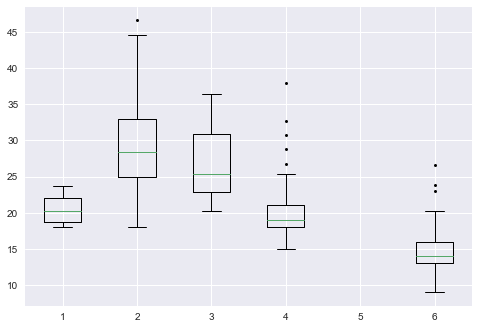

In [20]:
plt.boxplot([auto[auto.cylinders==c].mpg.values for c in range(3,9)], sym='k.')
plt.show()

From the collection of boxplots above, it seems like the distribution of "mpg" is affected by the numbers of cylinders.

Now remove the 10th through the 85th obervations and compare the new summary with the original one.

In [23]:
new_auto=pd.concat([auto[:10],auto[86:]])
new_auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000,316.000000
mean,24.407595,5.373418,187.512658,2936.53481,15.717405,77.136076,1.601266
std,7.863285,1.654179,100.114616,811.87445,2.713876,3.123464,0.819910
min,11.000000,3.000000,68.000000,1649.00000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,2213.75000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,145.500000,2792.50000,15.500000,77.000000,1.000000
75%,30.550000,6.000000,250.000000,3508.00000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.00000,24.800000,82.000000,3.000000


Suppose we want to predict "mpg". Intuitively the gas mileage should be related to weight (e.g. a heavy car will use more fuel):

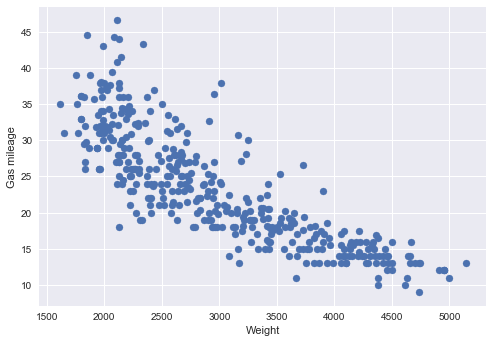

In [24]:
plt.scatter(auto.weight.values,auto.mpg.values)
plt.xlabel('Weight')
plt.ylabel('Gas mileage')
plt.show()

This shows quite a high correlation between the 2 variables and at first sight it looks like a linear relationship. There also seems to be a correlation between gas mileage and horsepower:

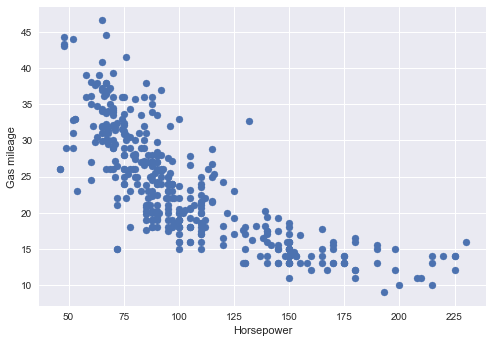

In [25]:
plt.scatter(auto.horsepower.values,auto.mpg.values)
plt.xlabel('Horsepower')
plt.ylabel('Gas mileage')
plt.show()

Fit a simple linear regression model with $\textbf{horsepower}$ as predictor variable and $\textbf{mpg}$ as response variable.

In [6]:
X=auto['horsepower'].values.reshape(-1,1)
y=auto['mpg'].values.reshape(-1,1)
lm=LinearRegression()
lm.fit(X,y)
print('Coefficient: ', lm.coef_[0],'\n Intercept: ', lm.intercept_[0])

Coefficient:  [-0.15784473] 
 Intercept:  39.9358610212


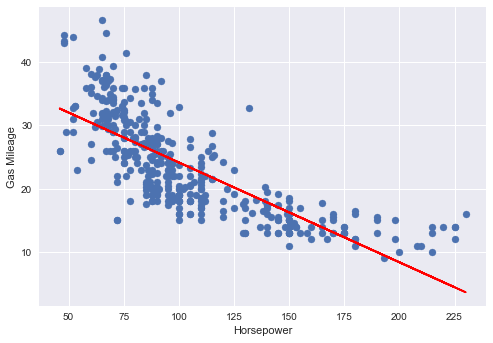

In [10]:
plt.scatter(auto.horsepower.values,auto.mpg.values)
plt.xlabel('Horsepower')
plt.ylabel('Gas Mileage')
plt.plot(auto.horsepower.values, lm.predict(X), '-', color='red')
plt.show()

There's a negative relationship between the predictor and response. The command below returns the $R^{2}$ statistic:

In [11]:
lm.score(X,y)

0.60594825788943485

This means that approximately $61\%$ of the variability in $mpg$ can be explained using $horsepower$. Compute the residual plot:

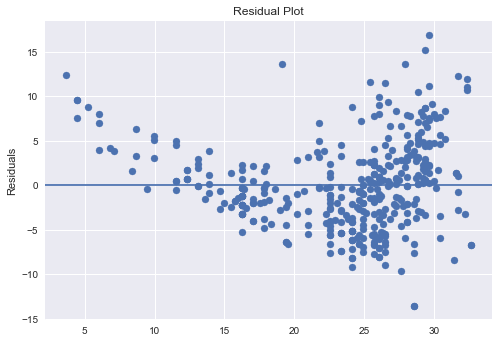

In [34]:
resid=auto.mpg.values.reshape(-1,1)-lm.predict(X)
plt.scatter(lm.predict(X), resid)
plt.axhline(y=0)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.show()